In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms.transforms as transforms

from tqdm import tqdm

TRAIN_IMG_PATH="G:/Dataset/CASIA-HWDB/HWDB1.1 img/train"                  
TEST_IMG_PATH="G:/Dataset/CASIA-HWDB/HWDB1.1 img/test"

BATCH_SIZE = 4
INPUT_SIZE = 3*32*32
HIDDEN_1_SIZE = 512
OUTPUT_SIZE = 10
EPOCH_NUM = 30

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.ImageFolder(root=TRAIN_IMG_PATH, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = torchvision.datasets.ImageFolder(root=TEST_IMG_PATH, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

dataiter = iter(train_dataloader)

data = dataiter.next()
images, labels = data

print(images[0])
print(images.shape)
print(labels)

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.8745, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.8980, 1.0000, 0.9608],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9608, 1.0000],
         ...,
         [1.0000, 1.0000, 0.9529,  ..., 0.9608, 0.9765, 1.0000],
         [0.9765, 0.8980, 1.0000,  ..., 1.0000, 0.9922, 1.0000],
         [1.0000, 0.9294, 1.0000,  ..., 1.0000, 0.9843, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.8745, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.8980, 1.0000, 0.9608],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9608, 1.0000],
         ...,
         [1.0000, 1.0000, 0.9529,  ..., 0.9608, 0.9765, 1.0000],
         [0.9765, 0.8980, 1.0000,  ..., 1.0000, 0.9922, 1.0000],
         [1.0000, 0.9294, 1.0000,  ..., 1.0000, 0.9843, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.8745, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.8980, 1.0000, 0.9608],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9608, 1.

tensor([0, 9, 8, 8])


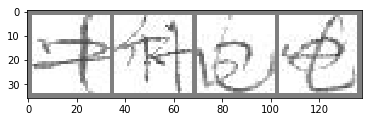

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    nping = np.transpose(nping, (1, 2, 0))
    plt.imshow(nping)

dataiter = iter(train_dataloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(labels)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 28 * 28, OUTPUT_SIZE)
        #self.fc2 = nn.Linear(HIDDEN_1_SIZE, OUTPUT_SIZE)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.view(-1, 16 * 28 * 28)
        x = self.fc1(x)

        # x = self.fc2(x)

        return x

net = Net().cuda()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=10, bias=True)
)


In [4]:
criterion = nn.CrossEntropyLoss()

# lr 如何设置 momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
train_loss_hist = []
test_loss_hist = []

for epoch in tqdm(range(EPOCH_NUM)):
    running_loss = 0.0
    num = 1
    for i, data in enumerate(train_dataloader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        #print(images.shape)
        outputs = net(images)
        #print(labels)
        #print(outputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        num = i + 1
        if(i % 250 == 0):
            with torch.no_grad():
                for test_data in test_dataloader:
                    test_images, test_labels = test_data
                    test_images = test_images.cuda()
                    test_labels = test_labels.cuda()
                    test_outputs = net(test_images)
                    test_loss = criterion(test_outputs, test_labels)
            
            train_loss_hist.append(running_loss / num)
            test_loss_hist.append(test_loss.item())
            running_loss = 0.0
            num = 1

        # if(i % 1000 == 0):
        #     print('step: %d loss: %.3f' % (i, loss))

100%|██████████| 30/30 [02:39<00:00,  5.31s/it]


[2.299828052520752, 1.8070921377831721, 0.3826858235928351, 0.9231390357017517, 0.4829017954518596, 0.24459883362471224, 0.7026321887969971, 0.2161712075372141, 0.10188441029089891, 0.4694662094116211, 0.06635104517537758, 0.042272623249156746, 0.005696296691894531, 0.02264695789709509, 0.011874880143506322, 2.002716064453125e-05, 0.006184955517134344, 0.0023980110943198443, 0.0026209354400634766, 0.0026758391543688525, 0.0011452445964851303, 0.00019240379333496094, 0.001663973606915113, 0.0007372280794703318, 0.0009326934814453125, 0.0013430892708766982, 0.0005528657974121338, 0.0012819766998291016, 0.0009339667886376856, 0.0005192352150252717, 0.0005128383636474609, 0.0008475585762723034, 0.00045297174396629106, 0.0009050369262695312, 0.0007670832820147632, 0.0003211831380269247, 0.0009162425994873047, 0.0006258183741474531, 0.0003592561105054296, 0.0007932186126708984, 0.000535161371725014, 0.00031197071075439453, 1.430511474609375e-06, 0.0005783683275321566, 0.0002256848379047569, 

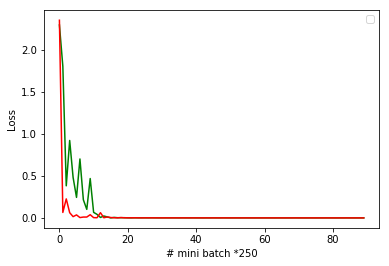

In [6]:
import matplotlib.pyplot as plt

print(train_loss_hist)
plt.figure()
plt.plot(train_loss_hist, color='green')
plt.plot(test_loss_hist, color='red')
plt.legend('train_loss', 'test_loss')
plt.xlabel('# mini batch *250')
plt.ylabel('Loss')

In [7]:
# 测试模型

correct = 0.0
total = 0.0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        correct += (predicted == labels).sum()
        total += labels.size(0)
    
print('准确率：', float(correct) / total)

准确率： 0.9282136894824707


In [27]:
# 准确率： 0.8397328881469115   2 fc
# 准确率： 0.9282136894824707   2 cnn